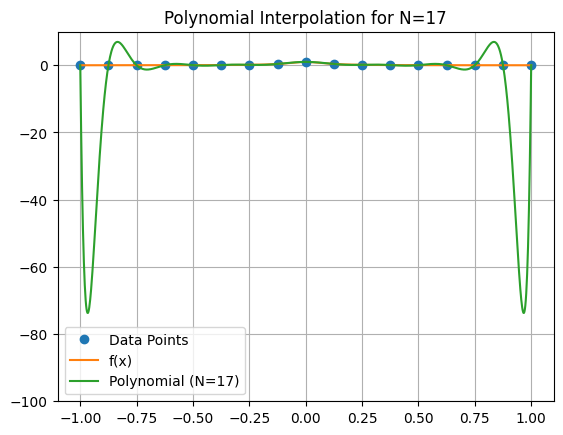

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + (10 * x)**2)

# Define the points for interpolation
def get_xi(N):
    h = 2 / (N - 1)
    return np.array([-1 + (i - 1) * h for i in range(1, N + 1)])

# Get polynomial coefficients
def interpolate_polynomial(N):
    xi = get_xi(N)
    yi = f(xi)
    V = np.vander(xi, increasing=True)
    c = np.linalg.solve(V, yi)
    return c, xi, yi

# Polynomial evaluation function
def evaluate_polynomial(c, x):
    return np.polyval(c[::-1], x)

# Function to plot
def plot_interpolation(N):
    # Interpolation points
    c, xi, yi = interpolate_polynomial(N)

    # Plot original data points
    plt.plot(xi, yi, 'o', label='Data Points')

    # Define a finer grid
    x_fine = np.linspace(-1, 1, 1001)
    
    # Plot the original function on a finer grid
    plt.plot(x_fine, f(x_fine), label='f(x)')

    # Plot the interpolated polynomial
    plt.plot(x_fine, evaluate_polynomial(c, x_fine), label=f'Polynomial (N={N})')

    plt.title(f'Polynomial Interpolation for N={N}')
    plt.legend()
    plt.grid(True)
    plt.ylim([-100, 10])  # Adjusting the y-limits to observe the "Runge Phenomenon"
    plt.show()


plot_interpolation(17)


/var/folders/2y/4ydf1r5x3lz1mksx0rhvm69c0000gn/T/ipykernel_1505/1447004793.py:35: RuntimeWarning: divide by zero encountered in divide
  temp = np.where(mask, 0, w[j] / diff)


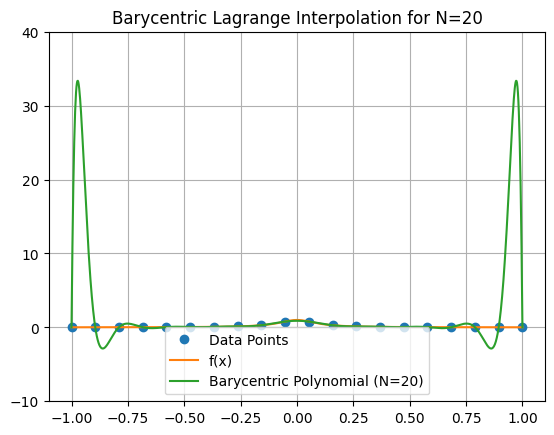

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return 1 / (1 + (10 * x)**2)

# Define the points for interpolation
def get_xi(N):
    h = 2 / (N - 1)
    return np.array([-1 + (i - 1) * h for i in range(1, N + 1)])

# Define the function for computing barycentric weights
def compute_weights(xi):
    N = len(xi)
    w = np.ones(N)
    for j in range(N):
        for i in range(N):
            if i != j:
                w[j] /= (xi[j] - xi[i])
    return w

# Barycentric Lagrange Interpolation (Formula 2)
def barycentric_lagrange_interpolation(xi, yi, x_eval):
    N = len(xi)
    w = compute_weights(xi)
    num = np.zeros_like(x_eval)
    denom = np.zeros_like(x_eval)
    exact_idx = np.zeros_like(x_eval, dtype=bool)
    
    for j in range(N):
        diff = x_eval - xi[j]
        mask = diff == 0
        exact_idx[mask] = True  # Mark exact matches
        temp = np.where(mask, 0, w[j] / diff)
        num += temp * yi[j]
        denom += temp

    # For points exactly equal to xi[j], return f(xi[j])
    p_x = np.where(exact_idx, yi[np.argmax(exact_idx)], num / denom)
    return p_x

# Function to plot interpolation using barycentric formula
def plot_barycentric_interpolation(N):
    # Interpolation points
    xi = get_xi(N)
    yi = f(xi)

    # Plot original data points
    plt.plot(xi, yi, 'o', label='Data Points')

    # Define a finer grid
    x_fine = np.linspace(-1, 1, 1001)

    # Plot the original function on a finer grid
    plt.plot(x_fine, f(x_fine), label='f(x)')

    # Plot the barycentric interpolated polynomial
    p_x_fine = barycentric_lagrange_interpolation(xi, yi, x_fine)
    plt.plot(x_fine, p_x_fine, label=f'Barycentric Polynomial (N={N})')

    plt.title(f'Barycentric Lagrange Interpolation for N={N}')
    plt.legend()
    plt.grid(True)
    plt.ylim([-10, 40])  # Adjusting the y-limits to observe the "Runge Phenomenon"
    plt.show()

# Test for increasing values of N
plot_barycentric_interpolation(20)


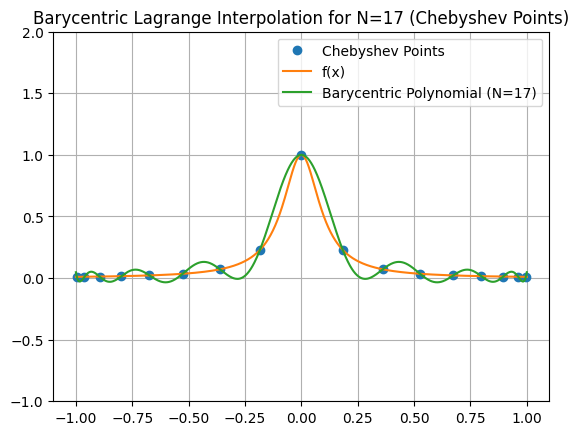

In [11]:
# Define the Chebyshev points for interpolation
def get_chebyshev_points(N):
    return np.array([np.cos((2*j - 1) * np.pi / (2 * N)) for j in range(1, N + 1)])

# Function to plot interpolation using Chebyshev points
def plot_chebyshev_interpolation(N):
    # Interpolation points (Chebyshev points)
    xi = get_chebyshev_points(N)
    yi = f(xi)

    # Plot original data points
    plt.plot(xi, yi, 'o', label='Chebyshev Points')

    # Define a finer grid
    x_fine = np.linspace(-1, 1, 1001)

    # Plot the original function on a finer grid
    plt.plot(x_fine, f(x_fine), label='f(x)')

    # Plot the barycentric interpolated polynomial
    p_x_fine = barycentric_lagrange_interpolation(xi, yi, x_fine)
    plt.plot(x_fine, p_x_fine, label=f'Barycentric Polynomial (N={N})')

    plt.title(f'Barycentric Lagrange Interpolation for N={N} (Chebyshev Points)')
    plt.legend()
    plt.grid(True)
    plt.ylim([-1, 2])  # Adjusting the y-limits to observe the "Runge Phenomenon" if any
    plt.show()

plot_chebyshev_interpolation(17)
